In [1]:
import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization


C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [24]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm


In [3]:
#Importing our required dataset
df = pd.read_csv("Fertilizer Prediction.csv")

In [34]:
#Printing out all of our features
df.columns


Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [35]:
#Converting unique objects  into integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])

In [15]:
y = df['Fertilizer Name']

In [16]:
y

0     6
1     5
2     1
3     4
4     6
     ..
94    4
95    0
96    6
97    5
98    3
Name: Fertilizer Name, Length: 99, dtype: int32

In [17]:
X = df[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous']]

In [18]:
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19
95,30,60,27,3,9,4,17,17
96,38,72,51,2,10,39,0,0
97,36,60,43,4,4,15,0,41


Decision Accuracy: 1.0


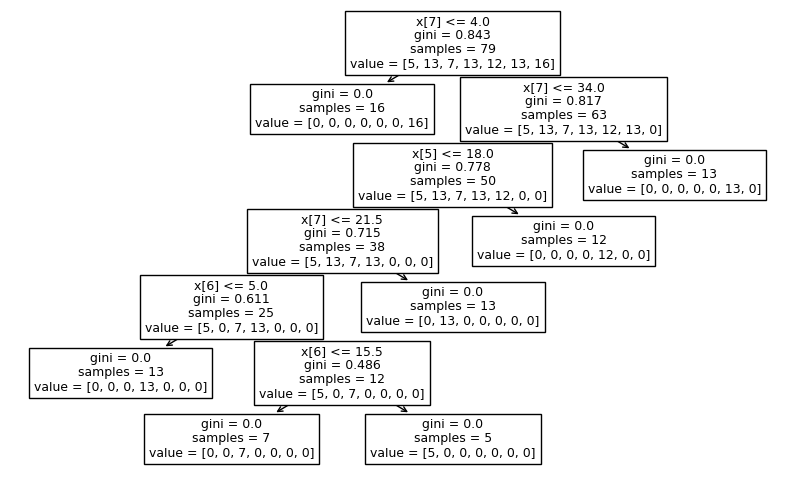

In [32]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Creating a Decision Tree Classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

#Training the model
dt_classifier.fit(X_train,y_train)

#Making predictions on the test set
predictions = dt_classifier.predict(X_test)

#Calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Decision Accuracy:",accuracy)

#PLotting the decision tree
plt.figure(figsize=(10,6))
plot_tree(dt_classifier)
plt.show()


In [21]:
#Creating a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

#Training the model
knn_classifier.fit(X_train, y_train)

#Making the predictions on test set
predictions = knn_classifier.predict(X_test)

#Calculating the accuracy store
accuracy = accuracy_score(y_test, predictions)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9


In [22]:
from sklearn.naive_bayes import GaussianNB

#Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#Training the model
gnb.fit(X_train, y_train)

#Making predictions on the test set
predictions = gnb.predict(X_test)

#Calculating accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 1.0


In [31]:
# Random Forest model training
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predicting from the test set
y_pred = random_forest.predict(X_test)

# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print('Accuracy: {0:0.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {0:0.5f}'.format(metrics.precision_score(y_test, y_pred, average='weighted')))
print('Recall: {0:0.5f}'.format(metrics.recall_score(y_test, y_pred, average='weighted')))
print('F1: {0:0.5f}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20

Accuracy: 0.95000
Precision: 1.00000
Recall: 0.95000
F1: 0.96667


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: